In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel('NLP.xlsx')

In [4]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
data_new=data.drop(['article_link'],axis=1)

In [6]:
data_new.sample(10)

,headline,is_sarcastic
182,magic-markered initials fail to deter breakroo...,1
207,7 ways to breakup like a boss,0
952,"george will trashes bill o'reilly: 'wise, he i...",0
909,terrified jeb bush beginning to fade from visi...,1
414,russia denies it has compromising information ...,0
1030,4 hours scrolling through facebook before bed ...,1
513,3m introduces new line of protective foam eye ...,1
273,hooded members of congress drown another love ...,1
895,trump hints at obamacare replacement that woul...,0
904,a big myth about how to spot a narcissist,0


In [7]:
data_new.shape

(1152, 2)

In [8]:
data_new.is_sarcastic.value_counts()

0    650
1    502
Name: is_sarcastic, dtype: int64

<AxesSubplot:xlabel='is_sarcastic'>

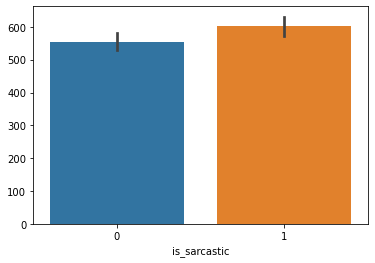

In [9]:
sns.barplot(y=data_new.index,x=data_new['is_sarcastic'])

In [10]:
lm=WordNetLemmatizer()
corpus=[]

In [11]:
for i in range(len(data_new)):
    review=re.sub('[^a-zA-z]',' ',data_new['headline'][i])
    review=review.lower()
    review=review.split()
    review=[lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [12]:
print(corpus)

['former versace store clerk sue secret black', 'roseanne revival catch thorny po', 'mom starting fear son web series closest thin', 'boehner want wife listen come wit', 'j k rowling wish snape happy birthday mo', 'advancing world woman', 'fascinating case eating lab grown meat', 'ceo send kid school wor', 'top snake handler leaf sinking huckabee campaign', 'friday morning email inside trump presser', 'airline passenger tackle man rush cockpit', 'facebook reportedly working healthcare feature', 'north korea praise trump urge u voter r', 'actually cnn jeffrey lord indefensibl', 'barcelona hold huge protest support refugee', 'nuclear bomb detonates rehearsal spide', 'cosby lawyer asks accuser come forward', 'stock analyst confused frightened boar market', 'bloomberg program build better city go', 'craig hick indicted', 'courtroom sketch artist clear manga influence', 'trump assures nation decision syrian air', 'qatar deporting dutch woman reported', 'go circus', 'ted cruz hit panic butto

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
tv=TfidfVectorizer(max_features=2000)
x=tv.fit_transform(corpus).toarray()

In [50]:
print(x[1].max())
print(len(x[0]))

0.5
2000


In [51]:
y=data_new['is_sarcastic']

In [52]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: is_sarcastic, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [55]:
lr=LogisticRegression()
sv=SVC()
gb=GaussianNB()
mb=MultinomialNB()

# Fitting Logistic Regression Model

In [56]:
lr.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred=lr.predict(x_test)

In [58]:
lr_score=accuracy_score(y_test,y_pred)

In [59]:
print(lr_score)

0.6184971098265896


In [60]:
lr_confusion_matrix=confusion_matrix(y_test,y_pred)

In [61]:
print(lr_confusion_matrix)

[[167  17]
 [115  47]]


<AxesSubplot:>

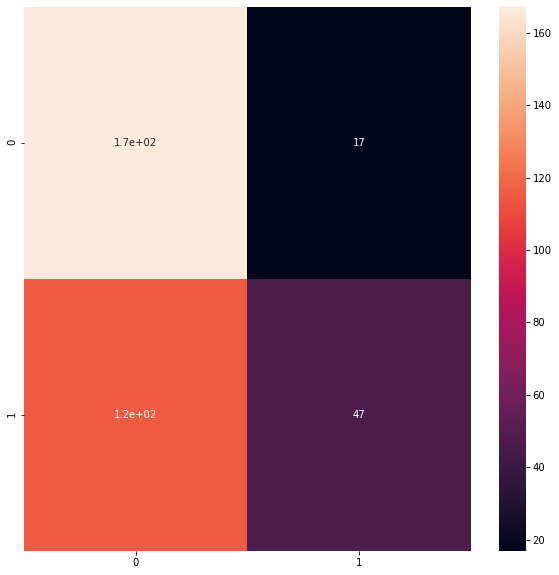

In [62]:
plt.figure(figsize=(10,10))
plt.xlabel('y_test')
plt.ylabel('y_pred')
sns.heatmap(lr_confusion_matrix,annot=True)

# Fitting SVM model

In [63]:
sv.fit(x_train,y_train)

SVC()

In [64]:
y_pred_sv=sv.predict(x_test)

In [65]:
sv_score=accuracy_score(y_test,y_pred_sv)

In [66]:
print(sv_score)

0.6040462427745664


In [67]:
sv_confusion_matrix=confusion_matrix(y_test,y_pred_sv)

In [68]:
print(sv_confusion_matrix)

[[168  16]
 [121  41]]


<AxesSubplot:>

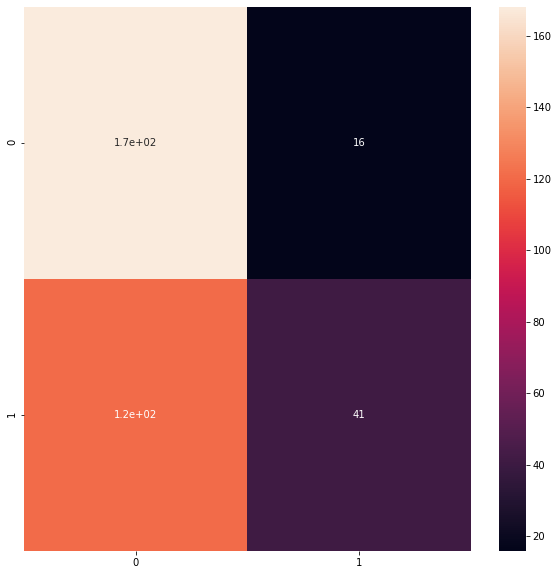

In [69]:
plt.figure(figsize=(10,10))
plt.xlabel('y_test')
plt.ylabel('y_pred')
sns.heatmap(sv_confusion_matrix,annot=True)

# Fitting GuassianNB

In [70]:
gb.fit(x_train,y_train)

GaussianNB()

In [71]:
y_pred_gb=gb.predict(x_test)

In [72]:
gb_score=accuracy_score(y_test,y_pred_gb)

In [73]:
print(gb_score)

0.6213872832369942


In [74]:
gb_confusion_matrix=confusion_matrix(y_test,y_pred_gb)

In [75]:
print(gb_confusion_matrix)

[[104  80]
 [ 51 111]]


<AxesSubplot:>

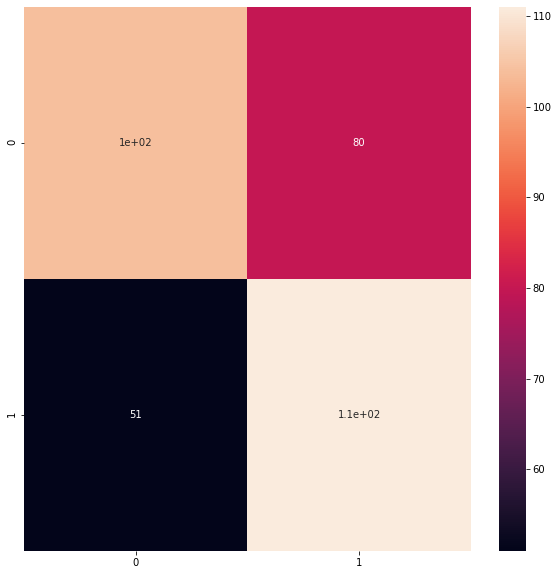

In [76]:
plt.figure(figsize=(10,10))
plt.xlabel('y_test')
plt.ylabel('y_pred')
sns.heatmap(gb_confusion_matrix,annot=True)

# Fitting MultinomialNb

In [77]:
mb.fit(x_train,y_train)

MultinomialNB()

In [78]:
y_pred_mb=mb.predict(x_test)

In [79]:
mb_score=accuracy_score(y_test,y_pred_mb)

In [80]:
print(mb_score)

0.6271676300578035


In [81]:
mb_confusion_matrix=confusion_matrix(y_test,y_pred_mb)

In [82]:
print(mb_score)

0.6271676300578035


<AxesSubplot:>

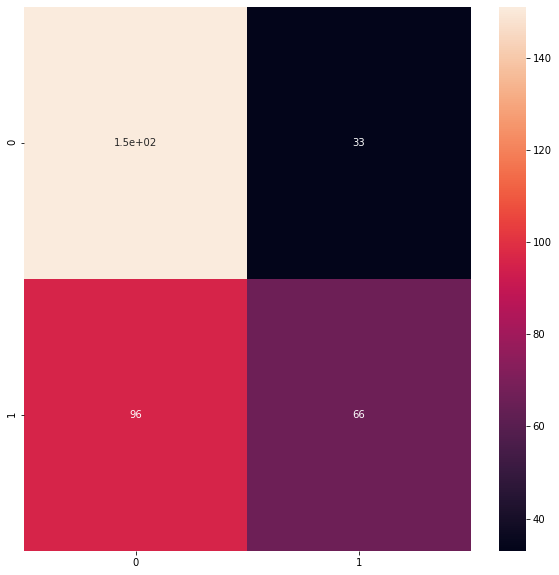

In [83]:
plt.figure(figsize=(10,10))
plt.xlabel('y_test')
plt.ylabel('y_pred')
sns.heatmap(mb_confusion_matrix,annot=True)